# Assignment:
## Building and Evaluating a Fully Connected Neural Network

## Objective
The goal of this assignment is to develop proficiency in constructing, training, and
evaluating a fully connected neural network (also known as a multilayer perceptron)
for a classification task. You will:
*   Select an appropriate dataset.
*   Preprocess the data.
*   Design and train a neural network model.
*   Visualize the training process and results.
*   Evaluate the model using metrics like the confusion matrix    and other relevant evaluation metrics.





In [1]:
import pandas as pd
import numpy as np
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Task 1. Dataset Selection
Choose of the the following datasets:
* MNIST Handwritten Digits: Classify images of handwritten digits (0-9).
* Iris Dataset: Classify iris plants into three species based on flower measurements.
* CIFAR-10: Classify images into 10 different categories like
airplanes, cars, birds, etc.

I'm chossing the MNIST Handwritten Digits Dataset

## Task 2. Data Preprocessing
* Load the Data:
  * Import the dataset using appropriate libraries (e.g., pandas, NumPy).
* Clean the Data:
  * Handle missing values (if any).
  * Remove or correct outliers.
* Feature Engineering:
  * Encode categorical variables using one-hot encoding or label encoding.
  * Normalize or standardize numerical features to improve model
performance.
* Split the Data:
  * Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

## ***Load the Data***

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))])

# Download and load the training data
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the test data
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.25MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.22MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Explanantion:
1. Define a transform:

  * `transforms.Compose(): `Creates a sequence of transformations to be applied to the data.
  * `transforms.ToTensor(): `Converts the PIL image to a PyTorch tensor.
  * transforms.Normalize(): Normalizes the tensor image with mean and standard deviation. We use the mean and standard deviation of the MNIST dataset for this.

2. Load the training data:

  * `datasets.MNIST()`: Loads the MNIST dataset.
    * ` './data'`: Specifies the directory to download the data to.
    * `train=True`: Indicates that we want the training data.
    * `download=True`: Downloads the data if it's not already present.
    * `transform=transform`: Applies the defined transform to the data.
  * `torch.utils.data.DataLoader()`: Creates a data loader to iterate over the dataset in batches.
    * `train_dataset`: The dataset to load.
    * `batch_size=64`: The size of each batch.
    * `shuffle=True`: Shuffles the data before each epoch.
3. Load the test data: Similar to loading the training data, but with `train=False `and` shuffle=False.`

## ***Clean the Data***

In [3]:
# Check for NaN values in the training data
nan_indices = np.isnan(train_dataset.data.numpy()).any(axis=(1, 2))
if nan_indices.any():
    print("Missing values found in training data!")
    # Handle missing values (e.g., remove or impute)

# Check for NaN values in the test data
nan_indices = np.isnan(test_dataset.data.numpy()).any(axis=(1, 2))
if nan_indices.any():
    print("Missing values found in test data!")

## Explanation:

1. We import numpy to use its functions for numerical operations.
2. We convert the PyTorch tensors `train_dataset.data` and `test_dataset.data` to NumPy arrays using `.numpy()`.
3. We use `np.isnan()` to check for `NaN `values in the arrays.
4. `any(axis=(1, 2))` checks if any NaN value is present along the image dimensions (rows and columns).
5. If any `NaN `values are found, we print a message indicating their presence and proceed to handle them. You can choose to remove the corresponding data points or impute the missing values using appropriate techniques.

## Feature Engineering

We already normalized the numerical features using transforms.Normalize while loading the dataset.

  * `transforms.ToTensor()`: Converts the PIL image to a PyTorch tensor. This automatically scales the pixel values to a range between 0 and 1.
  * `transforms.Normalize((0.1307,), (0.3081,))`: Applies normalization using the mean (0.1307) and standard deviation (0.3081) of the MNIST dataset. These values help center and scale the pixel values.

## Split the Data

## Explanation:

1. `datasets.MNIST('./data', train=True, ...)`: This line loads the training data from the MNIST dataset. The train=True argument specifies that we want the training set.

2. `datasets.MNIST('./data', train=False, ...)`: This line loads the testing data from the MNIST dataset. The train=False argument specifies that we want the testing set.

The MNIST dataset is already pre-divided into a training set of 60,000 images and a testing set of 10,000 images. This split is commonly used and provides a good balance for training and evaluating models.

Therefore, we don't need to explicitly split the data further. The train_dataset and test_dataset variables now hold the respective training and testing sets, which we can use for building and evaluating our PyTorch model.

## Task 3. Model Design and Training
* Build the Neural Network:
  * Use PyTorch.
  * Design a fully connected neural network architecture:
    *  Decide the number of hidden layers and neurons.
    * Choose activation functions (e.g., ReLU, sigmoid, softmax).
* Compile the Model:
    * Select an appropriate loss function (e.g., categorical cross-entropy for
multi-class classification).
    * Choose an optimizer (e.g., Adam, SGD).
Specify metrics to monitor (e.g., accuracy).
* Train the Model:
    * Set hyperparameters like batch size and number of epochs.
    * Include validation during training if desired.

## Build the Neural Network

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)  # Input layer (784 features) to hidden layer 1 (512 neurons)
        self.fc2 = nn.Linear(512, 256)   # Hidden layer 1 (512 neurons) to hidden layer 2 (256 neurons)
        self.fc3 = nn.Linear(256, 10)    # Hidden layer 2 (256 neurons) to output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = F.relu(self.fc1(x))  # Apply ReLU activation to hidden layer 1
        x = F.relu(self.fc2(x))  # Apply ReLU activation to hidden layer 2
        x = self.fc3(x)        # Output layer (no activation for logits)
        return x

1. Import necessary modules:

  * i`mport torch.nn as nn`: Imports the nn module, which provides building blocks for neural networks.
  * `import torch.nn.functional as F`: Imports the `F` module, which contains activation functions and other useful functions
2. Define the network class:

  * `class Net(nn.Module):` Creates a class called `Net` that inherits from `nn.Module`, the base class for all neural network modules in PyTorch.
3. Initialize the layers:

  * `__init__()`: The constructor of the class, where we define the layers of the network.
      * `self.fc1 = nn.Linear(28*28, 512)`: Creates a fully connected layer (`nn.Linear`) with 784 input features (28x28 pixels) and 512 output neurons (hidden layer 1).
      * `self.fc2 = nn.Linear(512, 256)`: Creates another fully connected layer with 512 input neurons (from hidden layer 1) and 256 output neurons (hidden layer 2).
      * `self.fc3 = nn.Linear(256, 10)`: Creates the output layer with 256 input neurons (from hidden layer 2) and 10 output neurons (representing the 10 digit classes).
4. Define the forward pass:

  * `forward(self, x)`: This method defines how the input data flows through the network.
x = x.view(-1, 28*28)`: Flattens the input image tensor into a vector of size 784.
    * `x = F.relu(self.fc1(x)`): Applies the ReLU activation function to the output of the first hidden layer.
    *  `x = F.relu(self.fc2(x))`: Applies the ReLU activation function to the output of the second hidden layer.
    * ` x = self.fc3(x)`: Passes the output of the second hidden layer through the output layer. No activation function is applied here as we want the raw output (logits) for the loss function to work with.
  * `return x`: Returns the output of the network.

Architecture Choices:
  *  Number of hidden layers: 2
  *  Number of neurons in hidden layers: 512 and 256
  *  Activation functions: ReLU (Rectified Linear Unit) for hidden layers, no activation for the output layer (logits)

## Compile the Model

In [5]:
# Instantiate the model
model = Net()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # lr is the learning rate


Explanation:

1. Import `optim`:

  * `import torch.optim as optim`: Imports the optim module, which provides various optimization algorithms.
2. Instantiate the model:

  * `model = Net()`: Creates an instance of the Net class we defined earlier, representing our neural network.
3. Define the loss function:

  * `criterion = nn.CrossEntropyLoss()`: We use `CrossEntropyLoss` as the loss function, which is suitable for multi-class classification problems. It combines the softmax activation and the negative log likelihood loss into a single function.
4. Define the optimizer:

  * `optimizer = optim.Adam(model.parameters(), lr=0.001)`: We use the Adam optimizer (`optim.Adam`) to update the model's parameters during training.
    * `model.parameters()`: Passes the model's parameters to the optimizer.
    * `lr=0.001`: Sets the learning rate to 0.001. You can adjust this value as needed.

####Choice of Loss Function, Optimizer, and Metrics:

  * Loss Function:` CrossEntropyLoss` is a standard choice for multi-class classification problems like MNIST.
  * Optimizer: Adam is a popular optimizer known for its efficiency and good performance. You can experiment with other optimizers like SGD (Stochastic Gradient Descent) as well.
  * Metrics: Accuracy is a common metric to monitor the overall correctness of the model's predictions. Other metrics like precision, recall, and F1-score can be used for a more detailed analysis.

Specify metrics to monitor

In [6]:
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)  # Get the predicted class labels
    total = labels.size(0)  # Total number of samples
    correct = (predicted == labels).sum().item()  # Number of correct predictions
    accuracy = correct / total  # Calculate accuracy
    return accuracy

Explanation:

1. `calculate_accuracy(outputs, labels)`: This function takes the model's outputs and the true labels as input.
2. `_, predicted = torch.max(outputs.data, 1)`: We use` torch.max()` to get the index of the highest value in the output tensor, which represents the predicted class label.
3. `total = labels.size(0)`: We get the total number of samples in the batch.
4. `correct = (predicted == labels).sum().item()`: We compare the predicted labels with the true labels and sum the number of correct predictions.
5. `accuracy = correct / total`: We calculate the accuracy by dividing the number of correct predictions by the total number of samples.
6. `return accuracy`: The function returns the calculated accuracy.

## Train the Model

In [7]:
import torch.optim as optim

# Hyperparameters
batch_size = 64  # Batch size for training
epochs = 10     # Number of training epochs
learning_rate = 0.001  # Learning rate for the optimizer
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Instantiate the model
model = Net()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    # Calculate training loss and accuracy for the epoch
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print progress (optional)
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch + 1, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


        train_loss += loss.item()  # Accumulate training loss
        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
  # Calculate average training loss and accuracy for the epoch
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_correct / train_total
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # Validation
    model.eval()
    # Calculate validation loss and accuracy for the epoch
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # No need to calculate gradients during validation
        for data, target in test_loader:
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()

    # Calculate average validation loss and accuracy for the epoch
    avg_val_loss = val_loss / len(test_loader)
    avg_val_acc = val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    model.train()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301796
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.305319
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.321183
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.237175
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.163042
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.085521
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.075857
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.273533
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.014530
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.110049
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.086296
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.087611
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.080075
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.115419
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.080759
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.116596
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.004952
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.175833
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.157664
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.013879
Train Epoch:

Explanation:

1. Hyperparameters:

  * `batch_size`: The number of samples processed in each iteration of the training loop.
  * `epochs`: The number of times the entire training dataset is passed through the model.
  * `learning_rate`: The step size taken by the optimizer to update the model's parameters.
2. Model, Loss Function, and Optimizer: These remain the same as defined in the previous steps.

3. Training Loop:

  * `for epoch in range(epochs):`: Iterates through the specified number of epochs.
  * `for batch_idx, (data, target) in enumerate(train_loader):`: Iterates through the training data in batches.
    * `optimizer.zero_grad()`: Resets the gradients of the optimizer to zero before each batch.
    * `output = model(data)`: Performs a forward pass through the model to get the predictions.
    * `loss = criterion(output, target)`: Calculates the loss between the predictions and the true labels.
    * `loss.backward()`: Computes the gradients of the loss with respect to the model's parameters.
    * `optimizer.step()`: Updates the model's parameters based on the calculated gradients.
    * `if batch_idx % 100 == 0:`: Prints the training progress every 100 batches (optional).

## Task 4. Visualization
* Plot Training Metrics:
  * Visualize training and validation loss over epochs.
  * Visualize training and validation accuracy over epochs.

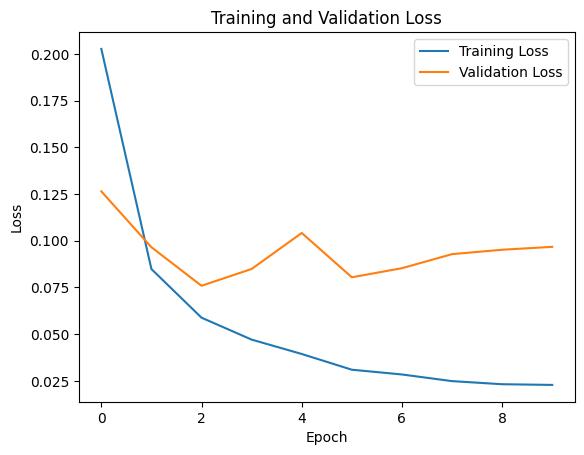

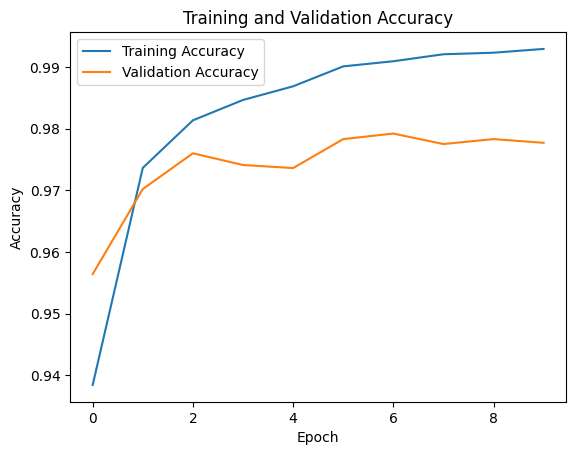

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Task 5. Model Evaluation
* Performance Metrics:
  * Confusion Matrix: Create a confusion matrix to evaluate classification performance across classes.
  * Accuracy: Measure the overall correctness.
  * Precision, Recall, F1-Score: Compute these metrics for a more detailed
performance analysis.
  * ROC Curve and AUC (if applicable): Plot and interpret the Receiver
Operating Characteristic curve.

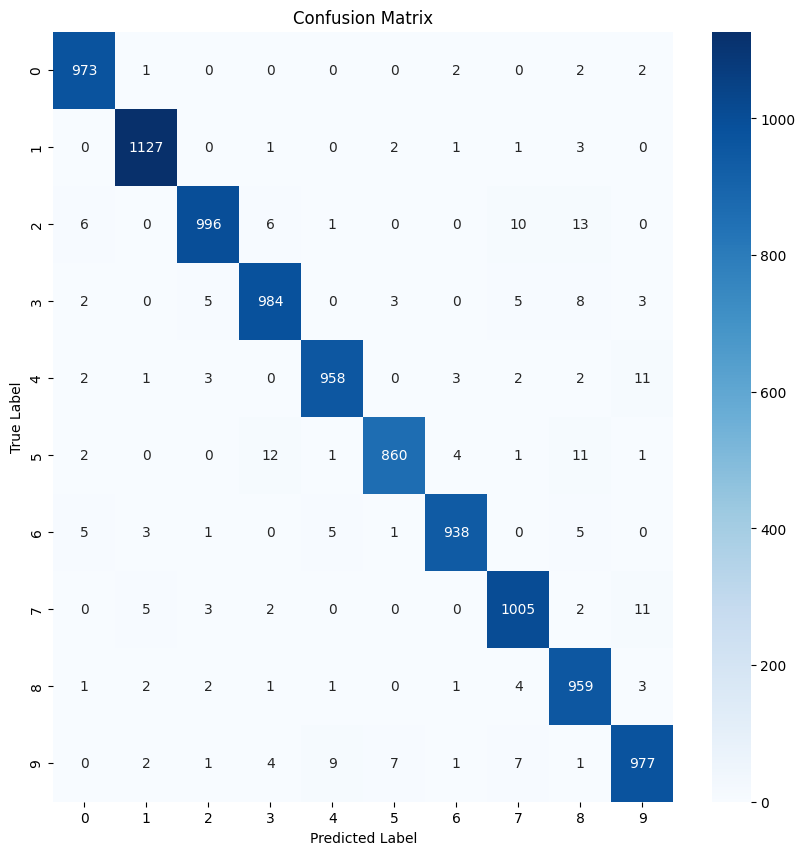

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (after training the model)

# Get predictions for the test set
y_pred = []
y_true = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        y_pred.extend(predicted.cpu().numpy())  # Move predictions to CPU and convert to NumPy array
        y_true.extend(target.cpu().numpy())  # Move targets to CPU and convert to NumPy array

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Accuracy: 0.9777
Precision: 0.9778122983188219
Recall: 0.9777
F1-score: 0.9777029333585059


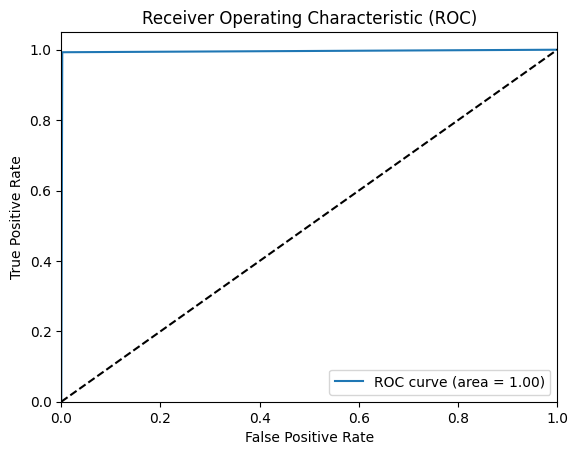

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# ... (after getting predictions for the test set)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# ROC curve and AUC (for binary classification)
# Since MNIST is a multi-class problem, we need to binarize the labels for ROC curve
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=list(range(10)))
y_pred_bin = label_binarize(y_pred, classes=list(range(10)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()